In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,8

In [9]:
from astropy.io import fits
import photutils
from bok.header_fix import header_fix
from common import *
from bok.constant import const

In [10]:
amp_fits = '/data/d7420.0130.04.fits'
amp_ldac = '/data/d7420.0130.04.ldac'

In [11]:
cata = fits.getdata(amp_ldac, 2)

In [12]:
cata.columns

ColDefs(
    name = 'NUMBER'; format = '1J'; disp = 'I10'
    name = 'X_IMAGE'; format = '1E'; unit = 'pixel'; disp = 'F10.3'
    name = 'Y_IMAGE'; format = '1E'; unit = 'pixel'; disp = 'F10.3'
    name = 'ELONGATION'; format = '1E'; disp = 'F8.3'
    name = 'FWHM_IMAGE'; format = '1E'; unit = 'pixel'; disp = 'F8.2'
    name = 'MAG_AUTO'; format = '1E'; unit = 'mag'; disp = 'F8.4'
    name = 'MAGERR_AUTO'; format = '1E'; unit = 'mag'; disp = 'F8.4'
    name = 'MAG_BEST'; format = '1E'; unit = 'mag'; disp = 'F8.4'
    name = 'MAGERR_BEST'; format = '1E'; unit = 'mag'; disp = 'F8.4'
    name = 'MAG_PETRO'; format = '1E'; unit = 'mag'; disp = 'F8.4'
    name = 'MAGERR_PETRO'; format = '1E'; unit = 'mag'; disp = 'F8.4'
    name = 'MAG_APER'; format = '1E'; unit = 'mag'; disp = 'F8.4'
    name = 'MAGERR_APER'; format = '1E'; unit = 'mag'; disp = 'F8.4'
    name = 'BACKGROUND'; format = '1E'; unit = 'count'; disp = 'G12.7'
    name = 'FLAGS'; format = '1I'; disp = 'I3'
)

In [13]:
c1 = fits.Column(name="MAG_CORR", format="1E")
c2 = fits.Column(name="MAGERR_CORR", format="1E")
cols = fits.ColDefs([ c1, c2 ])

In [63]:
cata.BACKGROUND

array([ 32772.80859375,  32772.80078125,  32772.26171875,  32772.7890625 ,
        32772.77734375,  32772.765625  ,  32772.76953125,  32771.93359375,
        32772.73828125,  32772.71875   ,  32772.734375  ,  32772.73046875,
        32772.6953125 ,  32772.69921875,  32771.890625  ,  32772.40625   ,
        32772.00390625,  32772.66015625,  32772.66015625,  32772.66015625,
        32771.984375  ,  32771.98828125,  32771.94140625,  32772.421875  ,
        32772.6171875 ,  32771.95703125,  32772.1484375 ,  32771.875     ,
        32772.6171875 ,  32772.30859375,  32772.60546875,  32772.546875  ,
        32772.33203125,  32772.53125   ,  32772.4375    ,  32772.203125  ,
        32772.53125   ,  32772.53515625,  32771.9921875 ,  32772.16015625,
        32771.76171875,  32771.765625  ,  32772.4921875 ,  32772.23828125,
        32772.23828125,  32772.44140625,  32771.98828125,  32772.015625  ,
        32772.01953125,  32772.28125   ,  32771.765625  ,  32771.9453125 ,
        32772.12109375,  

In [17]:
newtab = fits.BinTableHDU.from_columns(cata.columns + cols)

In [20]:
newtab.data.MAG_CORR

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.], dtype=float32)

In [14]:
image = fits.getdata(amp_fits) - 32768

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


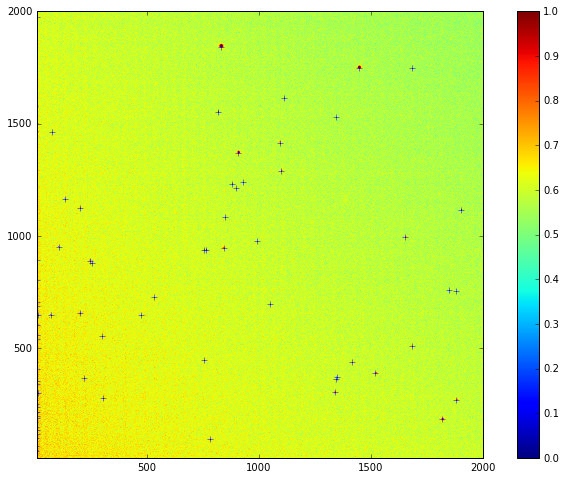

In [15]:
plt.imshow(np.log10(image), clim=(0,1))
plt.plot(cata.X_IMAGE, cata.Y_IMAGE, "+")
plt.xlim(10,2000)
plt.ylim(10,2000)
plt.colorbar()

In [34]:
sum(( (10 < cata.X_IMAGE) & (cata.X_IMAGE < 2000) & (10 < cata.Y_IMAGE) & (cata.Y_IMAGE < 2000) ))

58

In [38]:
def noborder(x, y, xlim, ylim) :
    return (xlim[0] < x) & (x < xlim[1]) & (ylim[0] < y) & (y < ylim[1])

In [16]:
from astropy.stats import sigma_clipped_stats
mean, median, std = sigma_clipped_stats(image, sigma=3.0, iters=5)
print (mean, median, std)

3.95168787124 3.93359375 0.335520028735


In [50]:
sigma_clipped_stats(cata.FWHM_IMAGE)

(4.845592659963688, 4.1341795921325684, 3.6407245261965655)

In [51]:
sdao = photutils.daofind(image, fwhm=4.0, threshold=3.*std)    
sdao

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,2013.5491297,1.72151567173,0.231265202381,0.568765289348,0.201179610191,25.0,0.0,3.79296875,4.11612440347,-1.53622123041
2,212.773210328,5.75770925596,0.491716586223,0.194564917556,0.697477405772,25.0,0.0,5.12890625,1.05342450574,-0.0565085427488
3,7.08011743371,6.62844648954,0.518211395861,0.333653012352,0.679974291464,25.0,0.0,6.4296875,1.12965049177,-0.132360239299
4,18.2547508791,6.99986614347,0.245367320682,-0.893150979291,-0.84273793542,25.0,0.0,5.3515625,1.17560257517,-0.175651321824
5,1187.26053091,6.75507272212,0.500732465867,0.0349631377903,-0.0208558222515,25.0,0.0,4.78515625,1.02514973896,-0.0269682636129
6,80.9621868461,9.9828811157,0.389624466239,-0.129695430224,-0.316674491156,25.0,0.0,5.09375,1.0180204651,-0.0193912715994
7,95.4960094208,9.87313665247,0.771956202857,-0.705592376135,-0.106159116335,25.0,0.0,5.70703125,1.04639659244,-0.0492407917925
8,703.200683842,10.1674305839,0.564232711415,-0.952368295196,-0.0819869698511,25.0,0.0,5.0625,1.08825101542,-0.0918227026478
9,5.89778881311,15.8956046061,0.427734812853,0.564015591535,-0.43798999257,25.0,0.0,6.1953125,1.79820854346,-0.637100141772


In [52]:
si = photutils.irafstarfind(image, fwhm=4.0, threshold=3.*std)    
si

id,xcentroid,ycentroid,fwhm,sharpness,roundness,pa,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,27.0010493638,1.39381749814,2.760055123,0.690013780749,0.176082216299,174.532688004,18.0,2.3076171875,3.1337890625,44.669921875,-4.12503798229
2,136.970260223,1.35068153656,2.74210157088,0.685525392721,0.17770664762,0.97000103106,18.0,2.51953125,2.7109375,37.828125,-3.94453703864
3,468.995792067,1.27223277056,2.79703637588,0.69925909397,0.187781215637,2.89218323894,18.0,2.3388671875,3.1220703125,38.060546875,-3.95118756045
4,565.957716514,1.32975800018,2.77527147898,0.693817869745,0.178977937184,2.92968143281,18.0,2.05859375,3.01953125,44.06640625,-4.11026908478
5,693.02583304,1.33004975624,2.77806372216,0.69451593054,0.179468916369,179.344855314,18.0,2.0791015625,2.6552734375,38.861328125,-3.97379409742
6,823.042948408,1.33558812477,2.7612343346,0.690308583649,0.199702598738,176.052901733,18.0,2.3193359375,2.5634765625,36.380859375,-3.90218238397
7,870.955974522,1.32096815287,2.78172348108,0.69543087027,0.199895018208,173.943681738,18.0,2.1884765625,2.8076171875,38.330078125,-3.9588492611
8,1132.02926984,1.31565830638,2.79186206053,0.697965515131,0.192106097158,6.37414478997,18.0,2.1728515625,2.3505859375,36.833984375,-3.91562174884
9,1152.99401616,1.33359928194,2.78463020395,0.696157550988,0.19184342811,1.00148654075,18.0,2.044921875,2.767578125,39.16796875,-3.98232762407


230 231


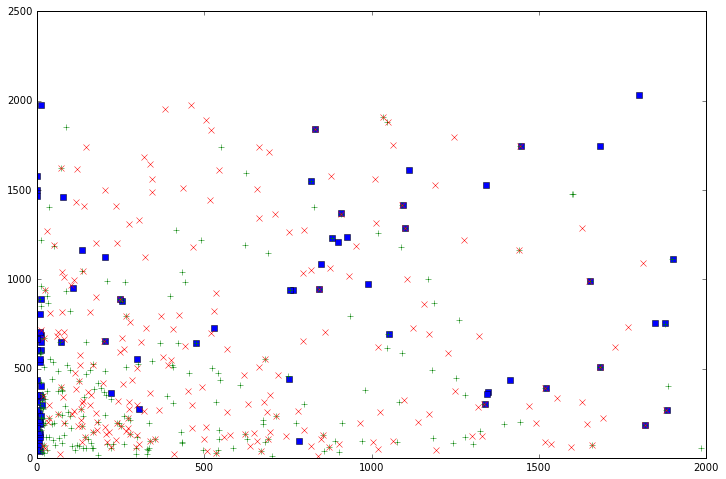

In [53]:
ixdao = np.where(noborder(sdao["xcentroid"], sdao["ycentroid"], (10, 2000), (10, 2000)))
#ixsou = np.where(noborder(sources["xcentroid"], sources["ycentroid"], (10, 2000), (10, 2000)))
ixi = np.where(noborder(si["xcentroid"], si["ycentroid"], (10, 2000), (10, 2000)))
plt.plot(cata.X_IMAGE, cata.Y_IMAGE, 's')
plt.plot(sdao[ixdao]["xcentroid"], sdao[ixdao]["ycentroid"], '+')
#plt.plot(sources[ixsou]["xcentroid"], sources[ixsou]["ycentroid"], 's')
plt.plot(si[ixi]["xcentroid"], si[ixi]["ycentroid"], 'x')
print (len(ixdao[0]), len(ixi[0]))

In [54]:
from photutils import CircularAperture

In [55]:
pos = list(zip(cata.X_IMAGE, cata.Y_IMAGE))

In [56]:
apertures = CircularAperture(pos, r=3.)

In [58]:
phot_aper_3 = photutils.aperture_photometry(image, apertures)
phot_aper_3

aperture_sum,xcenter,ycenter
,pix,pix
float64,float32,float32
157.743391985,8.96528,40.5508
153.824682471,8.20551,63.8452
142.799279948,783.797,92.0179
155.686761024,8.27093,96.8971
154.934958089,9.49722,115.495
156.938225216,10.5285,135.746
154.59338664,7.55164,145.246
254.411416778,1817.26,184.059


In [75]:
aper_flux = phot_aper_3["aperture_sum"] - 3*3*np.pi*(cata.BACKGROUND-32768.0)
aper_mag = 25.0 - 2.5 * np.log10(aper_flux)

In [67]:
sigma_clipped_stats(cata.BACKGROUND-32768)

(4.264672256097561, 4.23828125, 0.37205655872489085)

In [69]:
sigma_clipped_stats(image)

(3.9516878712434571, 3.93359375, 0.33552002873469028)

In [76]:
mag_d = aper_mag - cata.MAG_AUTO

(array([  0.,   0.,   0.,   2.,  11.,  15.,   2.,   1.,   1.,   0.,   0.,
          1.,   1.,   2.,   0.,   2.,   5.,   4.,   2.,  13.,   2.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,
         0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,
         1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5]),
 <a list of 30 Patch objects>)

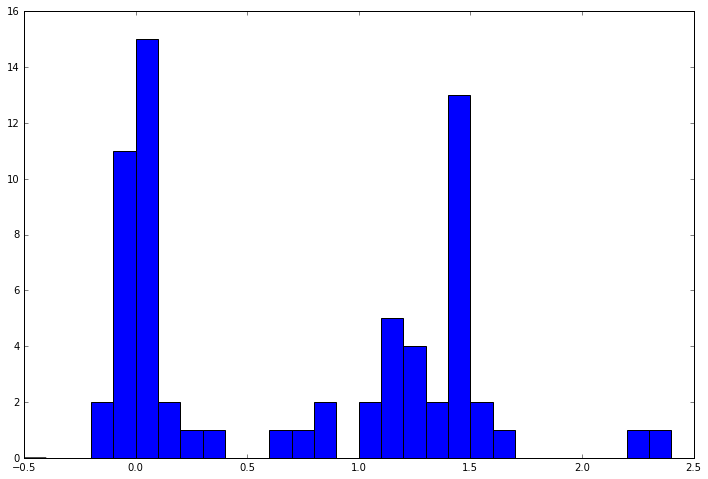

In [83]:
plt.hist(mag_d, range=(-0.5,2.5), bins=30)